<a href="https://colab.research.google.com/github/CHOIHANJOON/Another-Day-Another-Planting/blob/main/%EB%8D%B0%EC%9D%B4%EC%BD%98_%EC%97%B0%EC%8A%B5_LGBM_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# 데이터 다운로드 링크로 데이터를 코랩에 불러옵니다.

!wget 'https://bit.ly/3i4n1QB'

import zipfile
with zipfile.ZipFile('3i4n1QB', 'r') as existing_zip:
    existing_zip.extractall('data')

--2022-07-08 02:27:23--  https://bit.ly/3i4n1QB
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw [following]
--2022-07-08 02:27:23--  https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw
Resolving drive.google.com (drive.google.com)... 74.125.142.101, 74.125.142.138, 74.125.142.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/go960e9nmlhnk7nmfoq4o629uomisssb/1657247175000/17946651057176172524/*/1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw?e=download&uuid=22c90768-f3e2-4f91-aede-3ca3a3492c33 [following]
--2022-07-08 02:27:25--  https://doc-10-10-docs.go

In [15]:
import pandas as pd

**<데이터 확인 과정>**

In [16]:
train = pd.read_csv('data/train.csv')

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [18]:
train.shape

(5497, 14)

In [19]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


**결측치 유무 확인**

In [20]:
train.isnull().sum()

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [21]:
train.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [22]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
traincopy = train.copy()

In [24]:
# sns.distplot(df['피쳐명'], kde=True, bins=None)

# df['피쳐명']: 출력하고자 하는 컬럼

# kde: '그래프에 선을 출력할지 여부'

# bins: '출력할 막대그래프 갯수'

In [25]:
# matplotlib 의 axis() 매서드로 그래프 축의 최솟값 최댓값을 지정할 수 있음

# plt.axis(['x 축 최솟값,x축 최댓값,y 축 최솟값, y 축 최댓값'])

# plt.title('제목') << 제목 지정

# plt.show() << 그래프 출력

In [26]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 62 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,787 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [27]:
# 글꼴 설정
plt.rc('font', family = 'NanumBarunGothic')

# 마이너스 기호 출력
plt.rc('axes', unicode_minus=False)

# # 분석에 문제가 없는 경고 메세지는 숨긴다.
# import warnings
# warnings.filterwarnings('ignore')

In [28]:
traincopy2 = train.copy()

In [29]:
traincopy.columns

Index(['index', 'quality', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'type'],
      dtype='object')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50752 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51656 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50752 missing from current font.
  font.set_text(

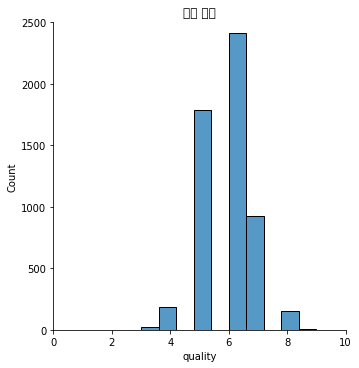

In [30]:
sns.displot(train['quality'],kde=False, bins=10)
plt.axis([0, 10, 0, 2500])
plt.title('와인 품질')
plt.show()

In [31]:
traincopy['quality'].

SyntaxError: ignored

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
x_values = [ 0,1,2,3,4] # x축 지점의 값들로 정할 리스트를 생성합니다.

y_values = [ 0,1,4,9,16]# y축 지점의 값들로 정할 리스트를 생성합니다.

plt.plot(x_values, y_values) # plot() 매서드를 활용해 그래프를 그립니다.


히스토그램 그리기
히스토그램은 도수분포표를 그래프로 나타낸 것.
변수들의 분포정도를 볼 때 유용함

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
# 변수 분포를 갖는 리스트를 생성합니다.
x_values = [1,2,3,3,3,4,4,4,4,4,4,5,5,5,5,5,6,6,6,7,]

# hist() 매서드를 활용해 그래프를 그립니다.
plt.hist(x_values)


# 그래프를 화면에 보여줍니다.
plt.show()

In [34]:
import seaborn as sns
import numpy as np

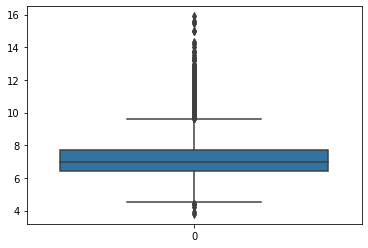

In [32]:
sns.boxplot(data=train['fixed acidity'])

In [36]:
# 'fixed acidity' 가 25%인 값을 'quantile_25' 라는 변수에 만들기
quantile_25 = np.quantile(train['fixed acidity'], 0.25)
# 'fixed acidity' 가 75%인 값을 'quantile_75' 라는 변수에 만들기
quantile_75 = np.quantile(train['fixed acidity'], 0.25)
# quantile_75와 quantile_25의 차이를 "IQR"이라는 변수에 만들어 주세요
IQR = quantile_75 - quantile_25
# quantile_25보다 1.5 * IQR 작은 값을 "minimum"이라는 변수에 만들어 주세요
minimum = quantile_25 - 1.5 * IQR
# quantile_75보다 1.5. * IQR 큰 값을 'maximum'이라는 변수에 만들어 주세요
maximum = quantile_25 + 1.5 * IQR
# 'fiexed acidity'가 minimum보다 크고 맥시멈보다 작은 값들만 트레인2에저장
train2 = train[(minimum <= train['fixed acidity']) & (train['fixed acidity'] <= maximum)]
# train2.shape를 통해서, 총 몇개의 행이 되었는지 확인
train2.shape


(248, 14)

In [37]:
train.shape[0] - train2.shape[0]

5249